In [35]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import silhouette_score, silhouette_samples
import pingouin as pg
from scipy import stats
from scipy.cluster.hierarchy import fcluster

from scipy.cluster.hierarchy import (linkage, optimal_leaf_ordering, leaves_list, dendrogram)
from sklearn.metrics import silhouette_samples, silhouette_score, adjusted_rand_score
import matplotlib.cm as cm

from scipy.spatial.distance import euclidean
from sklearn.metrics import silhouette_samples, silhouette_score, adjusted_rand_score
import matplotlib.cm as cm

from scipy.cluster.hierarchy import ClusterWarning
from warnings import simplefilter
simplefilter("ignore", ClusterWarning)

from sklearn.metrics import adjusted_mutual_info_score

In [36]:
longit = pd.read_csv('../../Results/GC_FC_paper/clustering/longitudinal_cluster_assignment.csv', index_col=0)
groups = pd.read_csv('../../Results/GC_FC_paper/figures/clustering_for_figures_GC_FC.csv', index_col=0)

cls_numbers = np.arange(74)+2

In [37]:
groups.columns

Index(['ROI', 'name', '2_cls_PT: Ses1_gc', '3_cls_PT: Ses1_gc',
       '4_cls_PT: Ses1_gc', '5_cls_PT: Ses1_gc', '6_cls_PT: Ses1_gc',
       '7_cls_PT: Ses1_gc', '8_cls_PT: Ses1_gc', '9_cls_PT: Ses1_gc',
       ...
       '66_cls_FT_fc', '67_cls_FT_fc', '68_cls_FT_fc', '69_cls_FT_fc',
       '70_cls_FT_fc', '71_cls_FT_fc', '72_cls_FT_fc', '73_cls_FT_fc',
       '74_cls_FT_fc', '75_cls_FT_fc'],
      dtype='object', length=446)

In [4]:
mi_matrix = {}

for group in ['PT: Ses1', 'PT: Ses2']:
    MI = np.zeros((len(cls_numbers),len(cls_numbers) ))
    for i in cls_numbers:
        for j in cls_numbers:
            ami =  adjusted_mutual_info_score(longit['{}_cls_PT_gc'.format(i)].values, 
                          groups['{}_cls_{}_fc'.format(j, group)].values)
            MI[i-2,j-2] = ami
    id_max = np.where(MI == MI.max())
    print(group, id_max[0]+2,id_max[1]+2 )
    print(MI.max())
    mi_matrix['lGC vs {}fc'.format(group)] = MI
    
for group in ['PT: Ses1', 'PT: Ses2']:
    MI = np.zeros((len(cls_numbers),len(cls_numbers) ))
    for i in cls_numbers:
        for j in cls_numbers:
            ami =  adjusted_mutual_info_score(longit['{}_cls_PT_fc'.format(i)].values, 
                          groups['{}_cls_{}_gc'.format(j, group)].values)
            MI[i-2,j-2] = ami
    id_max = np.where(MI == MI.max())
    print(group, id_max[0]+2,id_max[1]+2 )
    print(MI.max())
    mi_matrix['lFC vs {}gc'.format(group)] = MI


KeyboardInterrupt: 

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(20,20), sharex=True, sharey=True)
axs = axs.ravel()
cmap = sns.color_palette("vlag", as_cmap=True)

k = mi_matrix.keys()

for loc, group in enumerate(k):
    print(group, np.max(mi_matrix[group]))
    sns.heatmap(mi_matrix[group], 
            xticklabels=cls_numbers,
            yticklabels=cls_numbers, ax=axs[loc], vmin=0, vmax=.3)
    axs[loc].set_title('{} MI'.format(group), fontsize=40)
    axs[loc].set_ylabel('GC', fontsize=16)
    axs[loc].set_xlabel('FC', fontsize=16)
 
plt.tight_layout()
plt.show()

In [ ]:
#import pickle
#with open('../../Results/GC_FC_paper/clustering/MI_permutation_long_vs_groups.pickle', 'wb') as fp:
#    pickle.dump(mi_matrix, fp)

In [38]:
mi_matrix = pd.read_pickle('../../Results/GC_FC_paper/clustering/MI_permutation_long_vs_groups.pickle')

lGC vs PT: Ses1fc 0.3083509857619047 0.11238969412106209 0.0635780319677542
lGC vs PT: Ses2fc 0.29572097036957584 0.12296987984235538 0.05925542040916744
lFC vs PT: Ses1gc 0.3018840050728359 0.11027327769901014 0.05862941679245617
lFC vs PT: Ses2gc 0.24263954702645707 0.11101969704011819 0.04353805140214807


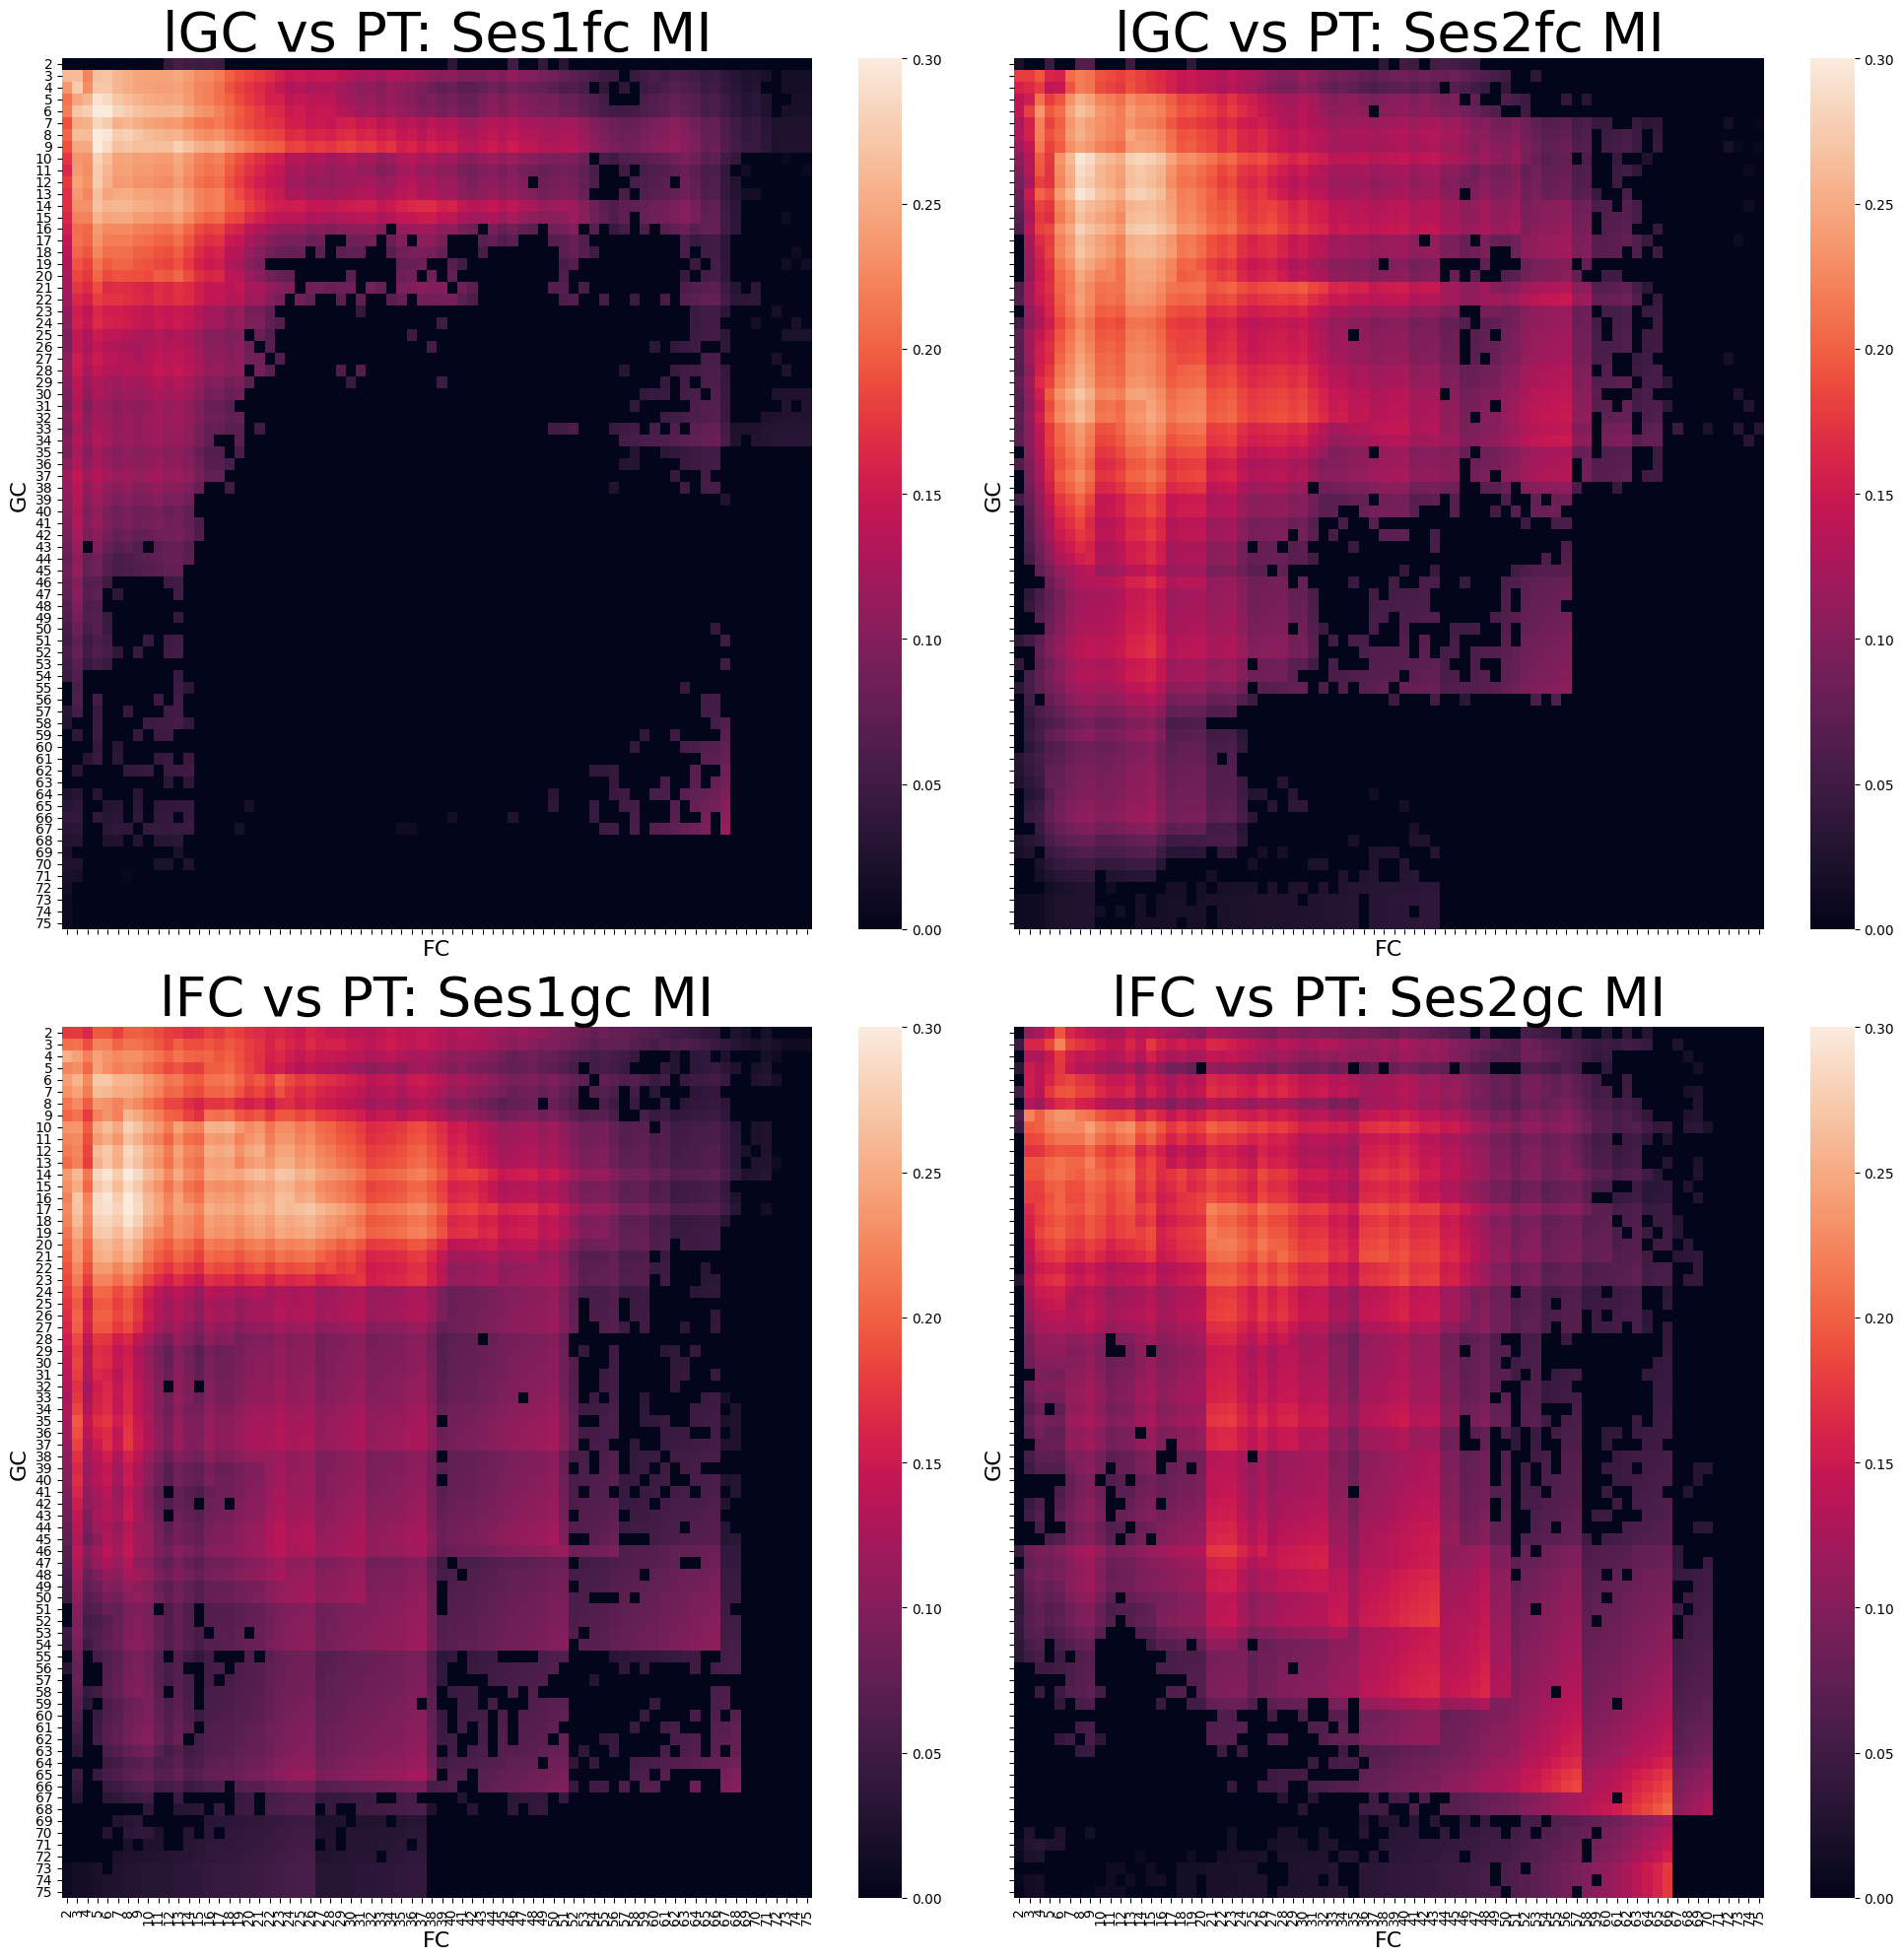

In [39]:
fig, axs = plt.subplots(2,2, figsize=(20,20), sharex=True, sharey=True)
axs = axs.ravel()
cmap = sns.color_palette("vlag", as_cmap=True)

k = mi_matrix.keys()

for loc, group in enumerate(k):
    
    g = mi_matrix[group]
    
    print(group, np.max(g), np.mean(g[g>0]), np.std(g[g>0]))
    sns.heatmap(mi_matrix[group], 
            xticklabels=cls_numbers,
            yticklabels=cls_numbers, ax=axs[loc], vmin=0, vmax=.3)
    axs[loc].set_title('{} MI'.format(group), fontsize=40)
    axs[loc].set_ylabel('GC', fontsize=16)
    axs[loc].set_xlabel('FC', fontsize=16)
 
plt.tight_layout()
plt.savefig('../../Results/GC_FC_paper/figures/long_vs_group_clustering_MI.jpg', dpi=5)
plt.show()

In [40]:
#### longitudinal between FC, GC
PT_c = pd.read_pickle('../../Results/GC_FC_paper/clustering/MI_permutation_longitudinal_with_updated_matrices.pickle')

PT_comparison = PT_c['PT'].ravel()
PT_comparison = PT_comparison[PT_comparison > 0]

lGC vs PT: Ses1fc 0.3083509857619047
lGC vs PT: Ses2fc 0.29572097036957584
lFC vs PT: Ses1gc 0.3018840050728359
lFC vs PT: Ses2gc 0.24263954702645707


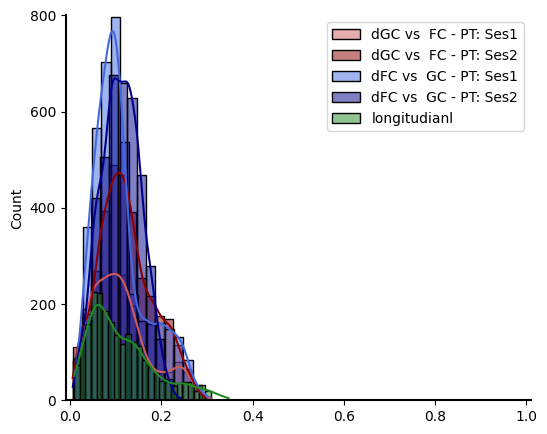

In [41]:
k = mi_matrix.keys()

fig, axs = plt.subplots(1,1, figsize=(6,5), sharey=True)


colors = {
    'lGC vs PT: Ses1fc' : ['indianred', 'dGC vs  FC - PT: Ses1'], 
    "lGC vs PT: Ses2fc": ['darkred', 'dGC vs  FC - PT: Ses2'], 
    "lFC vs PT: Ses1gc" : ['royalblue', 'dFC vs  GC - PT: Ses1'],
    "lFC vs PT: Ses2gc" : ['darkblue', 'dFC vs  GC - PT: Ses2']
        
}



bins = np.histogram_bin_edges(mi_matrix['lGC vs PT: Ses1fc'].ravel(), bins=25)

for loc, group in enumerate(k):
    print(group, np.max(mi_matrix[group]))
    
    g = mi_matrix[group].ravel()
    g = g[g>0]
    
    #sns.histplot(g, label=colors[group][1], kde=True, bins=bins, ax=axs, color=colors[group][0])
    
    sns.histplot(g, label=colors[group][1], kde=True, binwidth=0.02, ax=axs, color=colors[group][0])
    
    
    #sns.histplot(g, label=colors[group][1], kde=True, bins=bins, ax=axs, color=colors[group][0])
    
    #sns.histplot(change_dic['{}_{}'.format(correlome, 'PT')][idx_d], kde=True, 
    #             bins=bins, ax=axs[loc], color = 'darkmagenta', label='vs PT: Ses2')
    
sns.histplot(PT_comparison, label='longitudianl', kde=True, bins=bins, ax=axs, color='forestgreen')
    
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)    
axs.set_yticks(np.arange(0, 801, 200))

axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    axs.spines[axis].set_linewidth(1.5)
    
plt.xlim(-0.01,.37)
plt.ylim(-0.01,800)

plt.xlim(-0.01,1.01)
plt.ylim(-0.01,800)

    
plt.legend()
plt.savefig('../../Results/GC_FC_paper/update_figures/dC_FG_connectome_MI.jpg', dpi=300)

plt.show()

In [42]:
k

dict_keys(['lGC vs PT: Ses1fc', 'lGC vs PT: Ses2fc', 'lFC vs PT: Ses1gc', 'lFC vs PT: Ses2gc'])

lGC vs PT: Ses1fc 0.3083509857619047
lFC vs PT: Ses2gc 0.24263954702645707
lFC vs PT: Ses1gc 0.3018840050728359
lGC vs PT: Ses2fc 0.29572097036957584


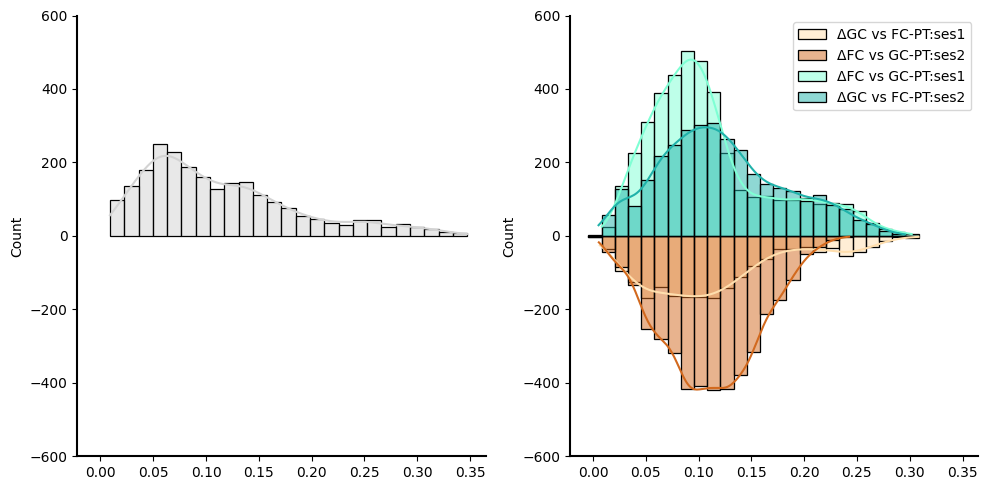

In [44]:
k = mi_matrix.keys()

fig, ax = plt.subplots(1,2, figsize=(10,5), sharex=True)


colors = {
    'lGC vs PT: Ses1fc' : ['navajowhite', u'ΔGC vs FC-PT:ses1'], 
    "lGC vs PT: Ses2fc": ['lightseagreen', u'ΔGC vs FC-PT:ses2'], 
    "lFC vs PT: Ses1gc" : ['aquamarine', u'ΔFC vs GC-PT:ses1'],
    "lFC vs PT: Ses2gc" : ['chocolate', u'ΔFC vs GC-PT:ses2']
        
}

bins = np.histogram_bin_edges(mi_matrix['lGC vs PT: Ses1fc'].ravel(), bins=25)

#### bottom (FC)


for loc, group in enumerate([ 'lGC vs PT: Ses1fc','lFC vs PT: Ses2gc']):
    print(group, np.max(mi_matrix[group]))
    g = mi_matrix[group].ravel()
    g = g[g>0]
    #sns.histplot(g, label=colors[group][1], kde=True, bins=bins, ax=axs, color=colors[group][0])
    sns.histplot(g, label=colors[group][1], kde=True, bins=bins, ax=ax[1], color=colors[group][0])

for p in ax[1].patches:  # turn the histogram upside down
    p.set_height(-p.get_height())
for l in ax[1].lines:  # turn the kde curve upside down
    l.set_ydata(-l.get_ydata())

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)   

for loc, group in enumerate([ 'lFC vs PT: Ses1gc','lGC vs PT: Ses2fc']):
    print(group, np.max(mi_matrix[group]))
    g = mi_matrix[group].ravel()
    g = g[g>0]
    #sns.histplot(g, label=colors[group][1], kde=True, bins=bins, ax=axs, color=colors[group][0])
    sns.histplot(g, label=colors[group][1], kde=True, bins=bins, ax=ax[1], color=colors[group][0])
    
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)    
ax[1].set_yticks(np.arange(-600, 601, 200))

ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax[1].spines[axis].set_linewidth(1.5)

ax[1].legend()
#plt.xlim(-0.01,.37)
#plt.ylim(-0.01,800)

#plt.xlim(-0.01,1.01)
#plt.ylim(-0.01,800)

sns.histplot(PT_comparison,  kde=True, bins=25, ax=ax[0],  color='lightgray', label=u'ΔGC vs ΔFC')
ax[0].set_yticks(np.arange(-600, 601, 200))

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)    
ax[0].set_yticks(np.arange(-600, 601, 200))

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax[0].spines[axis].set_linewidth(1.5)
    
    
   
plt.legend()
plt.tight_layout()


plt.savefig('../../Results/GC_FC_paper/update_figures/split_dC_FG_connectome_MI.jpg', dpi=300)

plt.show()

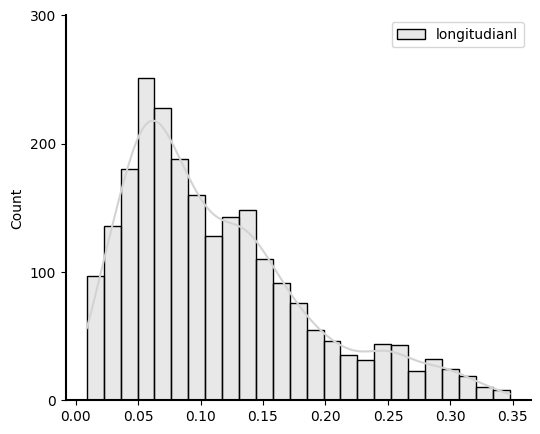

In [36]:

fig, axs = plt.subplots(1,1, figsize=(6,5), sharey=True)
bins = np.histogram_bin_edges(mi_matrix['lGC vs PT: Ses1fc'].ravel(), bins=25)   
sns.histplot(PT_comparison, label='longitudianl', kde=True, bins=25, ax=axs, color='lightgray')
    
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)    
axs.set_yticks(np.arange(0, 301, 100))

axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    axs.spines[axis].set_linewidth(1.5)
    
#plt.xlim(-0.01,.37)
#plt.ylim(-0.01,800)

#plt.xlim(-0.01,1.01)
#plt.ylim(-0.01,800)

    
plt.legend()
plt.savefig('../../Results/GC_FC_paper/update_figures/longitudinal_connectome_MI.jpg', dpi=300)

plt.show()

In [37]:
#### longitudinal between FC, GC
mi_matrix = pd.read_pickle('../../Results/GC_FC_paper/clustering/MI_permutation_longitudinal_with_updated_matrices.pickle')

PT_comparison = mi_matrix['PT'].ravel()
PT_comparison = PT_comparison[PT_comparison > 0]

PT 0.34728214782837163


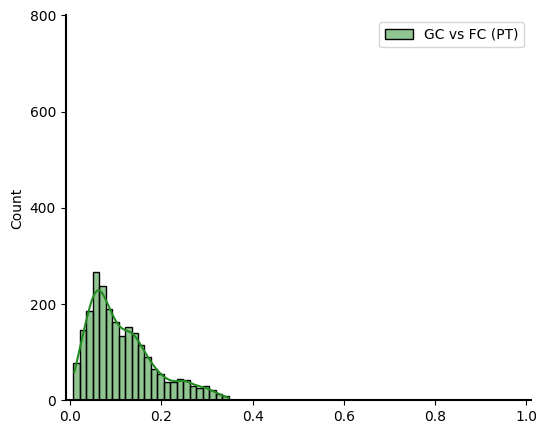

In [38]:
k = mi_matrix.keys()
k=['PT']
fig, axs = plt.subplots(1,1, figsize=(6,5), sharey=True)


colors = {
    'PT' : ['darkmagenta', 'GC vs FC (PT)'], 
    "FT": ['forestgreen', 'GC vs FC (FT)'], 
}



bins = np.histogram_bin_edges(mi_matrix['PT'].ravel(), bins=25)

for loc, group in enumerate(k):
    print(group, np.max(mi_matrix[group]))
    
    g = mi_matrix[group].ravel()
    g = g[g>0]
    
    #sns.histplot(g, label=colors[group][1], kde=True, bins=bins, ax=axs, color=colors[group][0])
    sns.histplot(g, label=colors[group][1], kde=True, bins=bins, ax=axs, color='forestgreen')
    
    #sns.histplot(g, label=colors[group][1], kde=True, bins=bins, ax=axs, color=colors[group][0])
    
    #sns.histplot(change_dic['{}_{}'.format(correlome, 'PT')][idx_d], kde=True, 
    #             bins=bins, ax=axs[loc], color = 'darkmagenta', label='vs PT: Ses2')
    
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)    
axs.set_yticks(np.arange(0, 801, 200))

axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    axs.spines[axis].set_linewidth(1.5)
    
plt.xlim(-0.01,.37)
plt.ylim(-0.01,800)

plt.xlim(-0.01,1.01)
plt.ylim(-0.01,800)

    
plt.legend()

plt.savefig('../../Results/GC_FC_paper/update_figures/lDF_lFC_MI.jpg', dpi=300)

plt.show()

In [39]:
### MUTUAL INFORMATION PER GROUP
### include permutation testing 

def random_shuffle_labels(vector):
    m_ids = np.arange(len(vector))
    np.random.shuffle(m_ids)
    shuf = vector[m_ids].copy()
    return shuf

permut = 50

mi_matrix = {}

for group in ['PT: Ses1', 'PT: Ses2']:
    MI = np.zeros((len(cls_numbers),len(cls_numbers) ))
    for i in cls_numbers:
        for j in cls_numbers:
            ami =  adjusted_mutual_info_score(longit['{}_cls_PT_gc'.format(i)].values, 
                          groups['{}_cls_{}_fc'.format(j, group)].values)
            
            null_MI = [adjusted_mutual_info_score(
                        random_shuffle_labels(longit['{}_cls_PT_gc'.format(i)].values),
                        random_shuffle_labels(groups['{}_cls_{}_fc'.format(j, group)].values))
                        for p in range(permut)]       
            null_MI.sort()
            if ami >= null_MI[-int(permut*0.05)]:
                MI[i-2,j-2] = ami
            else: 
                MI[i-2,j-2] = 0
    id_max = np.where(MI == MI.max())
    print(group, id_max[0]+2,id_max[1]+2 )
    print(MI.max())
    mi_matrix['lGC vs {}fc'.format(group)] = MI
    
for group in ['PT: Ses1', 'PT: Ses2']:
    MI = np.zeros((len(cls_numbers),len(cls_numbers) ))
    for i in cls_numbers:
        for j in cls_numbers:
            ami =  adjusted_mutual_info_score(longit['{}_cls_PT_fc'.format(i)].values, 
                          groups['{}_cls_{}_gc'.format(j, group)].values)
            null_MI = [adjusted_mutual_info_score(
                        random_shuffle_labels(longit['{}_cls_PT_fc'.format(i)].values),
                        random_shuffle_labels(groups['{}_cls_{}_gc'.format(j, group)].values))
                        for p in range(permut)]       
            null_MI.sort()
            if ami >= null_MI[-int(permut*0.05)]:
                MI[i-2,j-2] = ami
            else: 
                MI[i-2,j-2] = 0
    id_max = np.where(MI == MI.max())
    print(group, id_max[0]+2,id_max[1]+2 )
    print(MI.max())
    mi_matrix['lFC vs {}gc'.format(group)] = MI

KeyboardInterrupt: 

### Comparing same modality between groups

In [12]:
mi_matrix = {}

def random_shuffle_labels(vector):
    m_ids = np.arange(len(vector))
    np.random.shuffle(m_ids)
    shuf = vector[m_ids].copy()
    return shuf

permut = 25

for modality in ['fc', 'gc']:
    for comparison in [['PT: Ses1', 'PT: Ses2'], ['FT', 'PT: Ses2']]:
        MI = np.zeros((len(cls_numbers),len(cls_numbers) ))
        for i in cls_numbers:
            for j in cls_numbers:
                ami =  adjusted_mutual_info_score(groups['{}_cls_{}_{}'.format(i, comparison[0], modality)].values, 
                          groups['{}_cls_{}_{}'.format(j, comparison[1], modality)].values)
                
                null_MI = [adjusted_mutual_info_score(
                            random_shuffle_labels(groups['{}_cls_{}_{}'.format(i, comparison[0], modality)].values),
                            random_shuffle_labels(groups['{}_cls_{}_{}'.format(j, comparison[1], modality)].values)) 
                           for p in range(permut)]
                         
                null_MI.sort()
                if ami >= null_MI[-int(permut*0.05)]:
                    MI[i-2,j-2] = ami
                else: 
                    MI[i-2,j-2] = 0

        id_max = np.where(MI == MI.max())
        print(modality, comparison, id_max[0]+2,id_max[1]+2 )
        print(MI.max())
        mi_matrix['lGC vs {}_{}'.format(comparison, modality)] = MI       
                


fc ['PT: Ses1', 'PT: Ses2'] [73 74 75] [72 72 72]
0.7450632578770708
fc ['FT', 'PT: Ses2'] [72] [72]
1.0
gc ['PT: Ses1', 'PT: Ses2'] [7] [21]
0.38427509202948945
gc ['FT', 'PT: Ses2'] [2] [2]
1.0


In [13]:
#import pickle
#with open('../../Results/GC_FC_paper/clustering/MI_permutation_per_modality_within_group.pickle', 'wb') as fp:
#    pickle.dump(mi_matrix, fp)

In [40]:
mi_matrix = pd.read_pickle('../../Results/GC_FC_paper/clustering/MI_permutation_per_modality_within_group.pickle')

In [41]:
k

['PT']

lGC vs ['PT: Ses1', 'PT: Ses2']_fc 0.7450632578770708
lGC vs ['PT: Ses1', 'PT: Ses2']_fc 0.745 0.18 0.178 0.081
lGC vs ['FT', 'PT: Ses2']_fc 1.0
lGC vs ['FT', 'PT: Ses2']_fc 1.0 0.325 0.313 0.154
lGC vs ['PT: Ses1', 'PT: Ses2']_gc 0.38427509202948945
lGC vs ['PT: Ses1', 'PT: Ses2']_gc 0.384 0.181 0.19 0.091
lGC vs ['FT', 'PT: Ses2']_gc 1.0
lGC vs ['FT', 'PT: Ses2']_gc 1.0 0.333 0.331 0.172


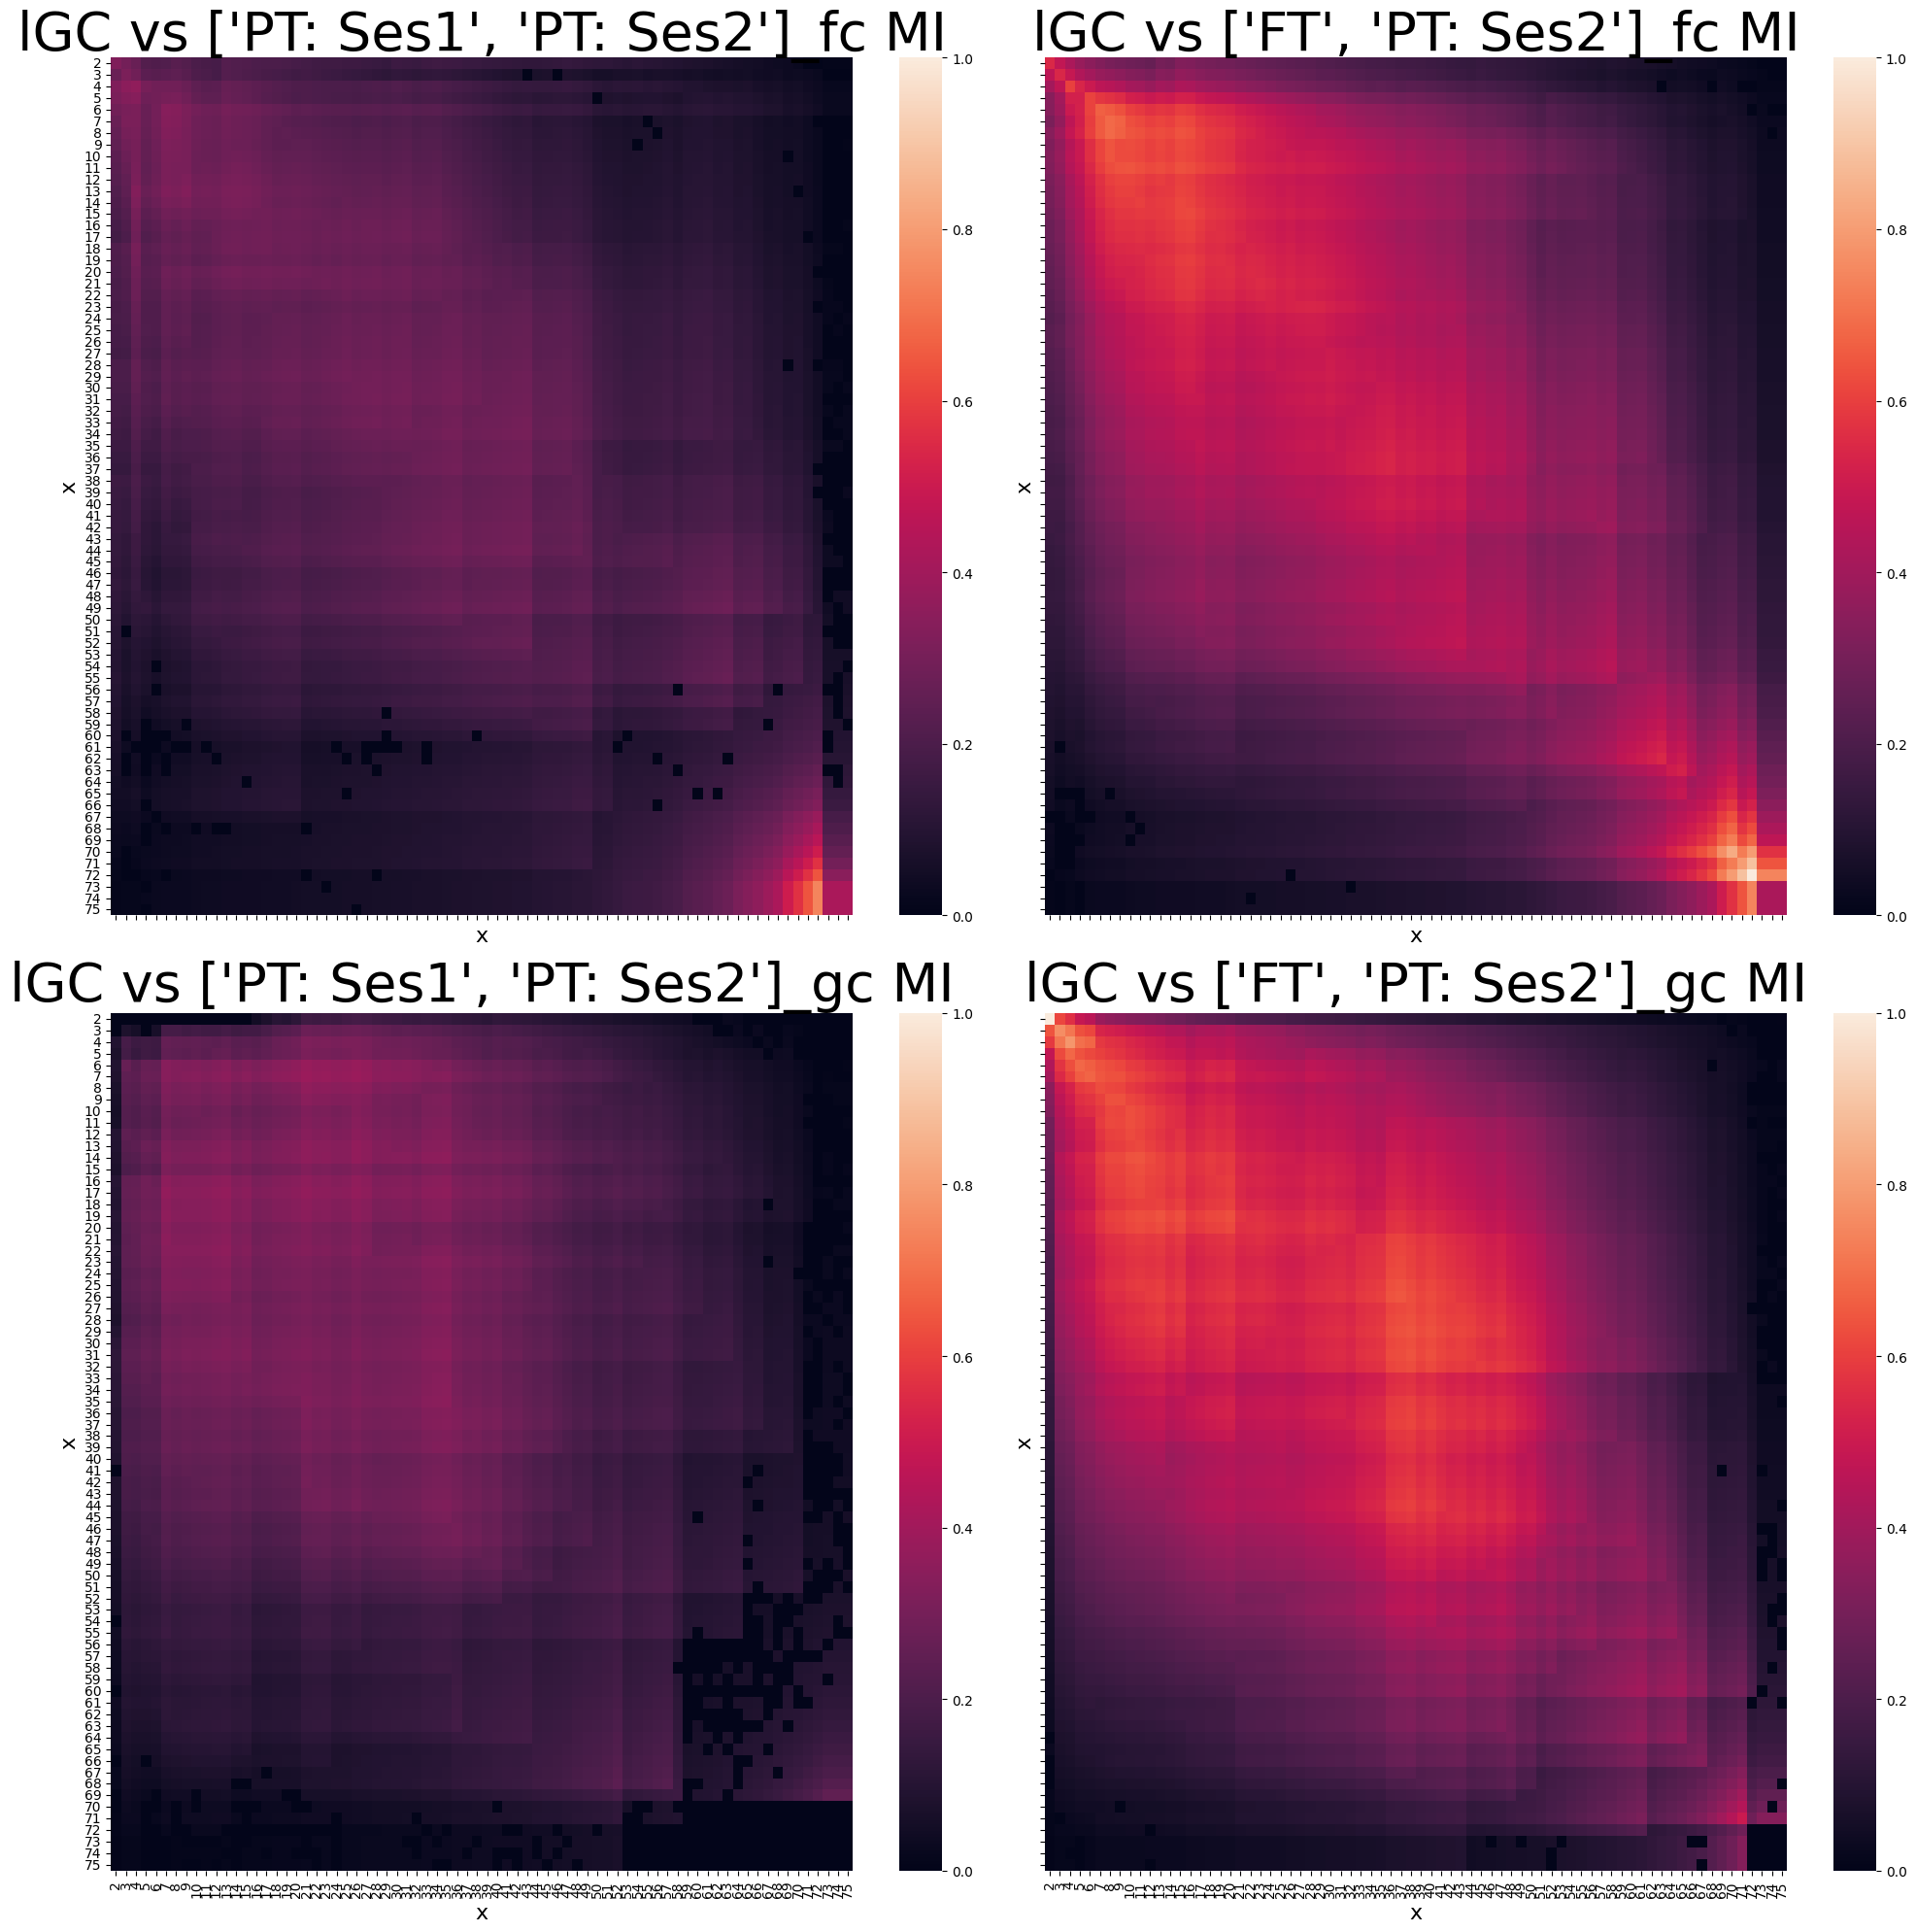

In [42]:
fig, axs = plt.subplots(2,2, figsize=(20,20), sharex=True, sharey=True)
axs = axs.ravel()
cmap = sns.color_palette("vlag", as_cmap=True)

k = mi_matrix.keys()

for loc, group in enumerate(k):
    print(group, np.max(mi_matrix[group]))
    
    g = mi_matrix[group]
    print(group, np.round(np.max(g), 3), np.round(np.median(g[g>0]),3), np.round(np.mean(g[g>0]),3), np.round(np.std(g[g>0]),3))
    
    sns.heatmap(mi_matrix[group], 
            xticklabels=cls_numbers,
            yticklabels=cls_numbers, ax=axs[loc], vmin=0, vmax=1)
    axs[loc].set_title('{} MI'.format(group), fontsize=40)
    axs[loc].set_ylabel('x', fontsize=16)
    axs[loc].set_xlabel('x', fontsize=16)
 
plt.tight_layout()
plt.show()

lGC vs ['PT: Ses1', 'PT: Ses2']_fc 0.7450632578770708
lGC vs ['FT', 'PT: Ses2']_fc 1.0
lGC vs ['PT: Ses1', 'PT: Ses2']_gc 0.38427509202948945
lGC vs ['FT', 'PT: Ses2']_gc 1.0


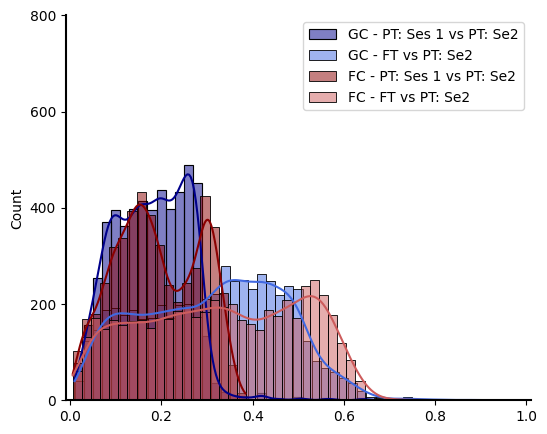

In [43]:
k = mi_matrix.keys()

fig, axs = plt.subplots(1,1, figsize=(6,5), sharey=True)


colors = {
    "lGC vs ['PT: Ses1', 'PT: Ses2']_fc" : ['darkblue', 'GC - PT: Ses 1 vs PT: Se2'], 
    "lGC vs ['FT', 'PT: Ses2']_fc": ['royalblue', 'GC - FT vs PT: Se2'], 
    "lGC vs ['PT: Ses1', 'PT: Ses2']_gc" : ['darkred', 'FC - PT: Ses 1 vs PT: Se2'],
    "lGC vs ['FT', 'PT: Ses2']_gc" : ['indianred', 'FC - FT vs PT: Se2']
        
}



bins = np.histogram_bin_edges(mi_matrix["lGC vs ['PT: Ses1', 'PT: Ses2']_fc"].ravel(), bins=25)



for loc, group in enumerate(k):
    print(group, np.max(mi_matrix[group]))
    
    g = mi_matrix[group].ravel()
    g = g[g>0]
    
    #sns.histplot(g, label=colors[group][1], kde=True, bins=bins, ax=axs, color=colors[group][0])
    sns.histplot(g, label=colors[group][1], kde=True, binwidth=0.02, ax=axs, color=colors[group][0])
    
    #sns.histplot(change_dic['{}_{}'.format(correlome, 'PT')][idx_d], kde=True, 
    #             bins=bins, ax=axs[loc], color = 'darkmagenta', label='vs PT: Ses2')
    
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)    
axs.set_yticks(np.arange(0, 801, 200))

axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    axs.spines[axis].set_linewidth(1.5)
    
plt.xlim(-0.01,1.01)
plt.ylim(-0.01,800)
        
    
plt.legend()
plt.savefig('../../Results/GC_FC_paper/update_figures/per_mod_within_group_MI.jpg', dpi=300)
plt.show()

In [44]:
k

dict_keys(["lGC vs ['PT: Ses1', 'PT: Ses2']_fc", "lGC vs ['FT', 'PT: Ses2']_fc", "lGC vs ['PT: Ses1', 'PT: Ses2']_gc", "lGC vs ['FT', 'PT: Ses2']_gc"])

In [49]:
g

array([0.32168281, 0.29399714, 0.26749329, ..., 0.41983063, 0.41983063,
       0.41983063])

lGC vs ['PT: Ses1', 'PT: Ses2']_fc 0.7450632578770708
lGC vs ['FT', 'PT: Ses2']_fc 1.0
lGC vs ['PT: Ses1', 'PT: Ses2']_gc 0.38427509202948945
lGC vs ['FT', 'PT: Ses2']_gc 1.0


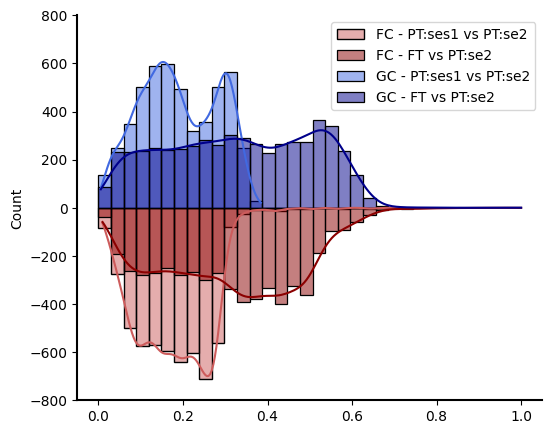

In [54]:
k = mi_matrix.keys()
fig, axs = plt.subplots(1,1, figsize=(6,5), sharey=True)
colors = {
    "lGC vs ['PT: Ses1', 'PT: Ses2']_fc" : ['indianred', 'FC - PT:ses1 vs PT:se2'], 
    "lGC vs ['FT', 'PT: Ses2']_fc": ['darkred', 'FC - FT vs PT:se2'], 
    "lGC vs ['PT: Ses1', 'PT: Ses2']_gc" : ['royalblue', 'GC - PT:ses1 vs PT:se2'],
    "lGC vs ['FT', 'PT: Ses2']_gc" : ['darkblue', 'GC - FT vs PT:se2']
        
}

bins = np.histogram_bin_edges(mi_matrix["lGC vs ['PT: Ses1', 'PT: Ses2']_fc"].ravel(), bins=25)

for loc, group in enumerate([ "lGC vs ['PT: Ses1', 'PT: Ses2']_fc","lGC vs ['FT', 'PT: Ses2']_fc"]):
    print(group, np.max(mi_matrix[group]))
    g = mi_matrix[group].ravel()
    g = g[g>0]
    
    #sns.histplot(g, label=colors[group][1], kde=True, bins=bins, ax=axs, color=colors[group][0])
    sns.histplot(g, label=colors[group][1], kde=True, bins=bins, ax=axs, color=colors[group][0])

for p in axs.patches:  # turn the histogram upside down
    p.set_height(-p.get_height())
for l in axs.lines:  # turn the kde curve upside down
    l.set_ydata(-l.get_ydata())

axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)   
    
for loc, group in enumerate([ "lGC vs ['PT: Ses1', 'PT: Ses2']_gc","lGC vs ['FT', 'PT: Ses2']_gc"]):
    print(group, np.max(mi_matrix[group]))
    g = mi_matrix[group].ravel()
    g = g[g>0]
    sns.histplot(g, label=colors[group][1], kde=True, bins=bins, ax=axs, color=colors[group][0])
    

    
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)    
axs.set_yticks(np.arange(-800, 801, 200))

axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    axs.spines[axis].set_linewidth(1.5)
    
#plt.xlim(-0.01,1.01)
#plt.ylim(-0.01,800)
        
    
plt.legend()
plt.savefig('../../Results/GC_FC_paper/update_figures/split_per_mod_within_group_MI.jpg', dpi=300)
plt.show()

In [ ]:
bins = np.histogram_bin_edges(mi_matrix['lGC vs PT: Ses1fc'].ravel(), bins=25)

#### bottom (FC)


for loc, group in enumerate([ 'lGC vs PT: Ses1fc','lGC vs PT: Ses2fc']):
    print(group, np.max(mi_matrix[group]))
    g = mi_matrix[group].ravel()
    g = g[g>0]
    #sns.histplot(g, label=colors[group][1], kde=True, bins=bins, ax=axs, color=colors[group][0])
    sns.histplot(g, label=colors[group][1], kde=True, bins=bins, ax=ax, color=colors[group][0])

for p in ax.patches:  # turn the histogram upside down
    p.set_height(-p.get_height())
for l in ax.lines:  # turn the kde curve upside down
    l.set_ydata(-l.get_ydata())

    ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)   
    
for loc, group in enumerate([ 'lFC vs PT: Ses1gc','lFC vs PT: Ses2gc']):
    print(group, np.max(mi_matrix[group]))
    g = mi_matrix[group].ravel()
    g = g[g>0]
    #sns.histplot(g, label=colors[group][1], kde=True, bins=bins, ax=axs, color=colors[group][0])
    sns.histplot(g, label=colors[group][1], kde=True, bins=bins, ax=ax, color=colors[group][0])
    
    
    
#sns.histplot(PT_comparison, label='longitudianl', kde=True, bins=bins, ax=axs, color='forestgreen')
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)    
ax.set_yticks(np.arange(-600, 601, 200))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1.5)
    
#plt.xlim(-0.01,.37)
#plt.ylim(-0.01,800)

#plt.xlim(-0.01,1.01)
#plt.ylim(-0.01,800)

    
plt.legend()